### <u>Importing Libraries</u>

In [1]:
#Importing libraries , Here we have used pandas for Reading the Csv, data cleaning ,data manipulation.
#Numpy and Matplotlib for various mathematical uses , lastly sklearn for Kmeans and min_max scaler.
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

### <u> Cleaning Data</u>

In [2]:
#Here ,we are checking for any missing values.
missing_value=["N/a","na",np.nan]
df=pd.read_csv("data.csv",na_values=missing_value)
df=df.replace(r'^\s*$', np.nan, regex=True)
df.isnull().sum()

Name                     0
Specialisation           0
City                     0
Hospital/Clinic          0
Experience               0
Padma_Vibhushan          0
Padma_Bhushan            0
Padma_Shri               0
Dhanvantari_Award        0
BC_Roy_National_Award    0
Other_Awards             0
dtype: int64

In [3]:
#Dropping the entries having missing values as it cannot be replaced i.e,- Specialisation ,City ,Hospital/Clinic ,Experience     
df=df.dropna()

### <u>Printing Data After Cleaning</u>

In [4]:
df.head()

,Name,Specialisation,City,Hospital/Clinic,Experience,Padma_Vibhushan,Padma_Bhushan,Padma_Shri,Dhanvantari_Award,BC_Roy_National_Award,Other_Awards
0,Prof. Dr. Suresh H. Advani,Medical Oncologist,Mumbai,"Jaslok Hospital, Mumbai",43,0,1,1,1,1,8
1,Dr. Ashok Seth,Interventional Cardiologist,New Delhi,"Fortis Escorts Heart Institute, New Delhi",38,0,1,1,0,0,8
2,Dr. Sandeep Vaishya,Neurosurgeon,Gurgaon,"Fortis Escorts Heart Institute, New Delhi",0,0,0,0,0,0,6
3,Dr IPS Oberoi,Orthopaedic and Joint Replacement Surgeon,Gurgaon,"Fortis Escorts Heart Institute, New Delhi",0,0,0,0,0,0,2
4,Prof. Dr. Mohamed Rela,Liver Transplant Surgeon,Chennai,"Dr. Rela Institute and Medical Centre, Chennai",31,0,0,0,0,0,9


In [5]:
#Here, we have used minmaxscaler to normalise the data of coumn Experience and Awards
scaler=MinMaxScaler()
scaled=s.fcalerit_transform(df[['Experience']])
df[['Experience']]=scaled
df['Awards']=60*df['Padma_Vibhushan']+50*df['Padma_Bhushan']+40*df['Padma_Shri']+30*df['Dhanvantari_Award']+20*df['BC_Roy_National_Award']+10*df['Other_Awards']
scaled2=scaler.fit_transform(df[['Awards']])
df[['Awards']]=scaled2
df.drop('Padma_Vibhushan',
  axis='columns', inplace=True)
df.drop('Padma_Bhushan',
  axis='columns', inplace=True)
df.drop('Padma_Shri',
  axis='columns', inplace=True)
df.drop('Dhanvantari_Award',
  axis='columns', inplace=True)
df.drop('BC_Roy_National_Award',
  axis='columns', inplace=True) 
df.drop('Other_Awards',
  axis='columns', inplace=True)
df

NameError: name 's' is not defined

## <u>Plotting Experience vs Awards after Normalising</u>

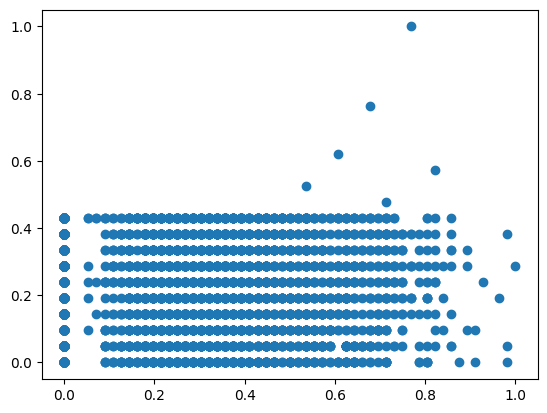

In [ ]:
#The scatter plot between Expereinece vs Awards helps in visualization of data
plt.scatter(df['Experience'],df['Awards'])

##   <u>Calculating SSE to measure how well the data set is Clustered.</u>

In [ ]:
#Here we have calculated the sum of squared error and measured how well it is clustered.
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Experience','Awards']])
    sse.append(km.inertia_)

## <u> Kmeans , Cluster and Labelling </u>

In [9]:
#We have divided the data in 4 clusters.
km=KMeans(n_clusters=4)
km

KMeans(n_clusters=4)

In [11]:
#Labelling to the dataset
y_predict=km.fit_predict(df[['Awards','Experience']])

KeyError: "['Awards'] not in index"

In [ ]:
df['cluster']=y_predict
df

,Name,Specialisation,City,Hospital/Clinic,Experience,Awards,cluster
0,Prof. Dr. Suresh H. Advani,Medical Oncologist,Mumbai,"Jaslok Hospital, Mumbai",0.767857,1.000000,2
1,Dr. Ashok Seth,Interventional Cardiologist,New Delhi,"Fortis Escorts Heart Institute, New Delhi",0.678571,0.761905,2
4,Prof. Dr. Mohamed Rela,Liver Transplant Surgeon,Chennai,"Dr. Rela Institute and Medical Centre, Chennai",0.553571,0.380952,2
6,Dr. R.C.M Kaza,Urologist and Andrologist,New Delhi,"Max Super Speciality hospital, Patparganj, Ne...",0.642857,0.380952,2
7,Dr Harit Chaturvedi,Surgical Oncologist,New Delhi,"Max Super Speciality Hospital, Saket, New Delhi",0.446429,0.285714,0
...,...,...,...,...,...,...,...
5520,Dr. Poonam Goyal,Radiation Oncologist,Jaipur,"Manipal Hospital, Jaipur",0.250000,0.428571,0
5521,Dr. Ashwini B Gowdra,Gynaecologist and Obstetrician,Koramangala,"Apollo Cradle & Children's Hospital, Koramangala",0.285714,0.238095,0
5522,Dr. Ayesha Sharieff,Gynaecologist and Obstetrician,Koramangala,"Apollo Cradle & Children's Hospital, Koramangala",0.285714,0.285714,0
5523,Dr. Deepesh Agarwal,Interventional Cardiologist,Jaipur,"Mahatma Gandhi Medical College & Hospital, Ja...",0.285714,0.380952,0


### <u>Enter the Name of the Doctor , Specialisation , City ,Experience , Award Points of the Doctor </u>

In [6]:
specialisaton=input("Enter the Specialisation of the Doctor: ")
city=input("Enter the City of the Doctor: ")
doctor_Experience=int(input("Enter the Experience of the Doctor: "))
doctor_Awards_Points=int(input("Enter the Award Points of the Doctor: "))

## <u> Actual Prediction </u>

In [8]:
predicted_user=km.predict([[doctor_Experience,doctor_Awards_Points]])
predicted_user

NameError: name 'km' is not defined

## <u>Finding better Doctor according to the experience and awards</u>

In [ ]:
#Using loop we have iterated the data set and used a condition to return the better doctor to the final list.
final=[]
if(predicted_user <4): #for outliers
    for i in range((df.shape[0])):
        if(str (df.iloc[i,2]).count(city)>0 and str (df.iloc[i,1]).count(specialisaton)>0 and df.iloc[i,6]==predicted_user and Experience_Normalised< float(df.iloc[i,4]) and Awards_Point_Normalised < float(df.iloc[i,5])):
            final.append(df.iloc[i])
else :
    print("Sorry! We cannot match these in data set")

## <u>Doctor list</u>

In [ ]:
#The final Data.
if(len(final)):
    print(final)
else:
    print("Your Doctor is the best in your Area.")

# <u> END </u>